In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
os.chdir("Desktop/CSC 310")

In [3]:
iris_df = pd.read_csv("iris.csv")

In [4]:
iris_df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.drop(['id'], axis=1, inplace=True)

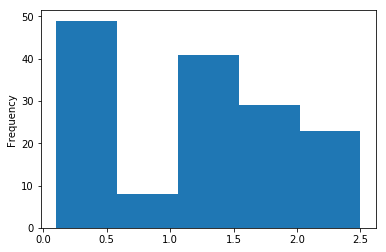

In [6]:
iris_df.loc[:,'Petal.Width'].plot.hist(bins=5)

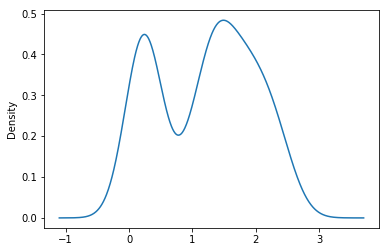

In [7]:
iris_df.loc[:,'Petal.Width'].plot.kde()

In [8]:
iris_df.loc[:,'Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

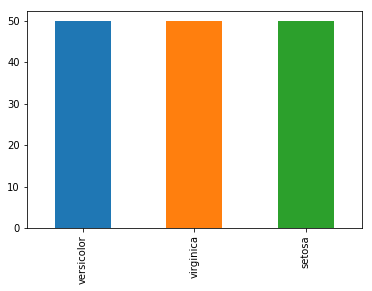

In [9]:
iris_df.loc[:,'Species'].value_counts().plot.bar()

In [10]:
plot_series = iris_df.loc[:,'Species'].rename('') # get rid of the 'Species' label


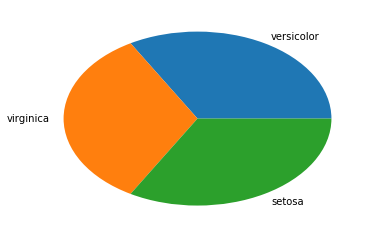

In [11]:
plot_series.value_counts().plot.pie() # plot the value counts of the labels

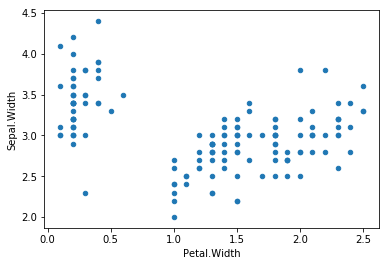

In [12]:
iris_df.plot.scatter(x='Petal.Width', y='Sepal.Width')

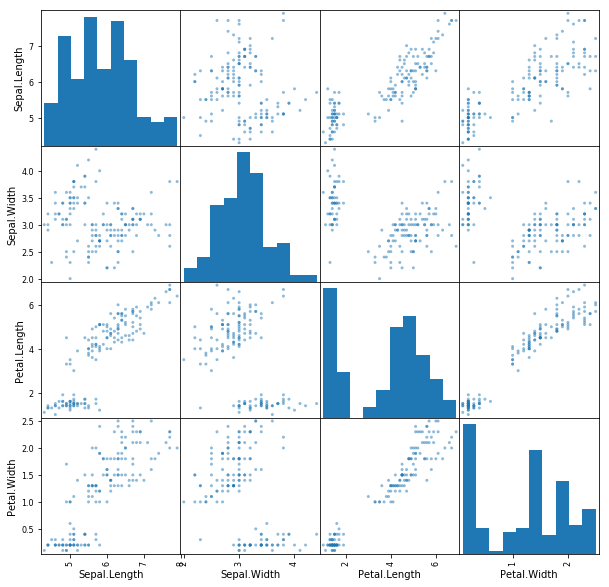

In [13]:
null = pd.plotting.scatter_matrix(iris_df, figsize=[10,10])

In [14]:
import seaborn as sns
sns.set()

In [15]:
iris_df = pd.read_csv("iris.csv")
iris_df.drop(['id'], axis=1, inplace=True)

In [16]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Drivers\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


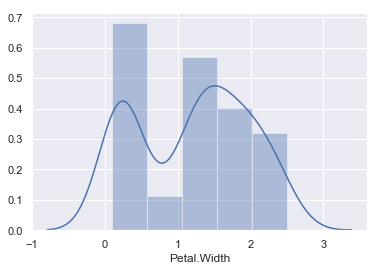

In [17]:
sns.distplot(iris_df.loc[:,'Petal.Width'], hist=True, kde=True, bins=5)

C:\Drivers\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


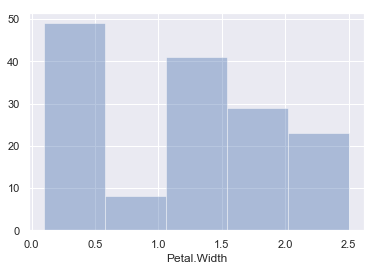

In [18]:
sns.distplot(iris_df.loc[:,'Petal.Width'], hist=True, kde=False, bins=None)

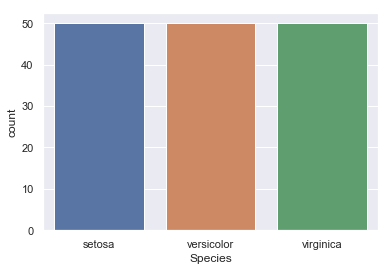

In [19]:
sns.countplot(iris_df.loc[:,'Species'])

C:\Drivers\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Drivers\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


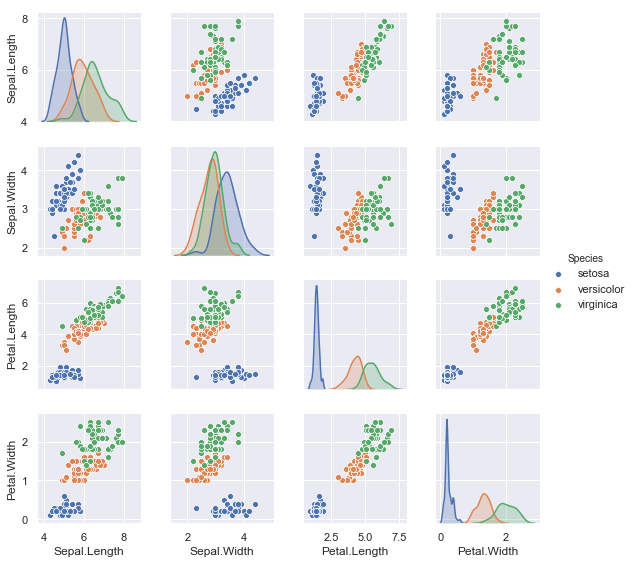

In [20]:
sns.pairplot(iris_df, hue='Species', size=2)

C:\Drivers\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Drivers\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


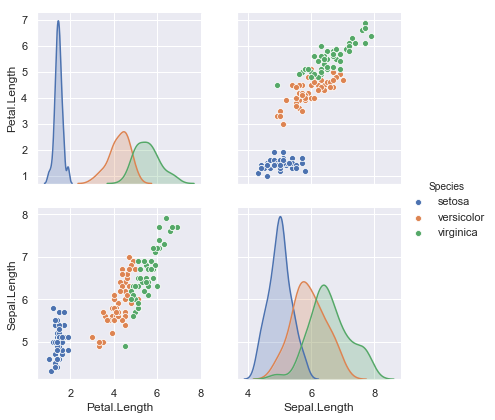

In [21]:
sns.pairplot(iris_df, hue='Species', size=3, vars=["Petal.Length", "Sepal.Length"])

C:\Drivers\Anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Drivers\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


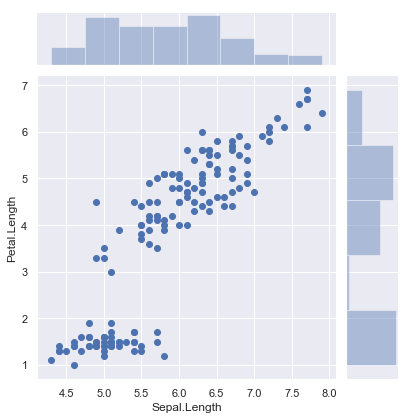

In [22]:

sns.jointplot(x="Sepal.Length", y="Petal.Length", data=iris_df, size=6)

C:\Drivers\Anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Drivers\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


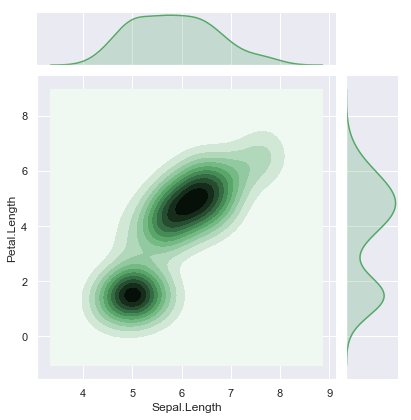

In [23]:

sns.jointplot(x="Sepal.Length", y="Petal.Length", data=iris_df, size=6, kind="kde", color="g")

## Visualizations and Models

Let's see if we can relate our decision tree model to what we are seeing in the data for the Iris data set.

In [24]:
from sklearn import tree
#from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [25]:
"""
treeviz.py
A simple tree visualizer for sklearn DecisionTreeClassifiers.
Written by Lutz Hamel, (c) 2017 - University of Rhode Island
"""
import operator

def tree_print(clf, X):
    """
    Print the tree of a sklearn DecisionTreeClassifier

    Parameters
    ----------
    clf : DecisionTreeClassifier - A tree that has already been fit.
    X : The original training set
    """
    tlevel = _tree_rprint('', clf, X.columns, clf.classes_)
    print('<',end='')
    for i in range(3*tlevel - 2):
        print('-',end='')
    print('>')
    print('Tree Depth: ',tlevel)

def _tree_rprint(kword, clf, features, labels, node_index=0, tlevel_index=0):
    # Note: The DecisionTreeClassifier uses the Tree structure defined in:
    # 		github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx
    #       it is an array based tree implementation:

    # indent the nodes according to their tree level
    for i in range(tlevel_index):
        print('  |',end='')

	#  TODO: the following should use the TREE_LEAF constant defined in _tree.pyx
	#        instead of -1, not quite sure how to get at it from the tree user level
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        print(kword, end=' ' if kword else '')
        # get the majority label
        count_list = clf.tree_.value[node_index, 0]
        #lhh
        #print("count list: {}".format(count_list))
        if len(count_list) == 1:
            # regression problem
            print(count_list[0])
        else:
            # get the majority label
            max_index, max_value = max(enumerate(count_list), key=operator.itemgetter(1))
            max_label = labels[max_index]
            print(max_label)
        return tlevel_index
    
    else:
        # compute and print node label
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        print(kword, end=' ' if kword else '')
        print('if {} =< {}: '.format(feature, threshold))
        # recurse down the children
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        ltlevel_index = _tree_rprint('then', clf, features, labels, left_index, tlevel_index+1)
        rtlevel_index = _tree_rprint('else', clf, features, labels, right_index, tlevel_index+1)
        # return the maximum depth of either one of the children
        return max(ltlevel_index,rtlevel_index)

In [26]:
iris_df = pd.read_csv("iris.csv")

In [27]:
features_df = iris_df.drop(['id','Species'],axis=1)
features_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
target_df = pd.DataFrame(iris_df['Species'])
target_df.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [29]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if Petal.Length =< 2.450000047683716: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then if Petal.Length =< 4.949999809265137: 
  |  |  |then if Petal.Width =< 1.6500000953674316: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else if Petal.Width =< 1.5499999523162842: 
  |  |  |  |then virginica
  |  |  |  |else if Petal.Length =< 5.449999809265137: 
  |  |  |  |  |then versicolor
  |  |  |  |  |else virginica
  |  |else if Petal.Length =< 4.850000381469727: 
  |  |  |then if Sepal.Width =< 3.0999999046325684: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |  |else virginica
<------------->
Tree Depth:  5


Too complicated, let's reduce the complexity of the model a bit.

In [30]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=4)
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if Petal.Length =< 2.450000047683716: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then versicolor
  |  |else virginica
<---->
Tree Depth:  2


In [31]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['Species']          # name the column - same name as in target!
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 0.96


Let's plot our tree model ontop of the scatter plot of the Petal.Length and Petal.Width variables.

In [32]:
import matplotlib.pyplot as plt
shrink_df = iris_df[['Petal.Width','Petal.Length','Species']]
shrink_df.head()

,Petal.Width,Petal.Length,Species
0,0.2,1.4,setosa
1,0.2,1.4,setosa
2,0.2,1.3,setosa
3,0.2,1.5,setosa
4,0.2,1.4,setosa


In [33]:
setosa_df = shrink_df[shrink_df.Species == 'setosa']
versicolor_df = shrink_df[shrink_df.Species == 'versicolor']
virginica_df = shrink_df[shrink_df.Species == 'virginica']

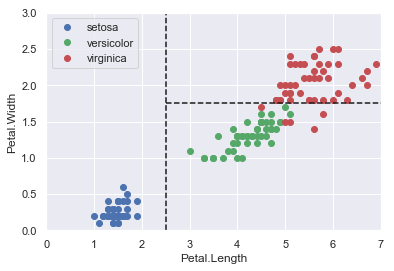

In [34]:
# scatter plot of the data
plt.plot(setosa_df['Petal.Length'],setosa_df['Petal.Width'],'bo')
plt.plot(versicolor_df['Petal.Length'],versicolor_df['Petal.Width'],'go')
plt.plot(virginica_df['Petal.Length'],virginica_df['Petal.Width'],'ro')
plt.axis([0, 7, 0, 3])
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend(['setosa','versicolor','virginica'])

# plotting the tree decision surfaces
plt.plot([2.5,2.5],[0,3.0],'k--')
plt.plot([2.5,7.0],[1.75,1.75], 'k--')

Our model found the patterns in the data that allows the separation of the three classes of iris flowers. The decision tree is also often called a piecewise linear model because it induces linear decision surfaces with in the data.

## Reading

* 4.5 [Histograms, Binnings, and Density]("https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html")
* 4.14 [Visualization with Seaborn]("https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html")
* [Pandas Visualization]("https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html")
* [Seaborn Homepage]("http://seaborn.pydata.org/index.html")
* [Matplotlib Pyplot Tutorial]("https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py")

## Team Project

In this project you will work with your last team to explore the second data set that you had to pick for the last assignment.

1. Use the visualization tools presented in this slide set to look at the data set. Are your independent variables uni- or multimodal? Can you identify clusters when performing scatter plots? Are those clusters related to your decision tree model from the last lab? What about the different labels/levels of your dependent variable - are they equally represented, that is, is your data set well balanced? If so why, if not how do you think the imbalance shows up in your tree model?

2. Find the simplest decision tree model whose accuracy is at least 80% of the accuracy of the best model you built in the previous assignment. E.g. if you best model had an accuracy of 0.95 then the simplified model should have an accuracy of not less than 0.95*0.8=0.75. How does the best decision tree model from your last assignment and your new, simplified model compare in terms of interpretability? Do they agree on the major trends/classifications? Can you relate the decision tree of the simplified model to clusters you have discovered in the previous part of this assignment?